In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


age 

sex

cp = chest pain type (4 values)

trestbps = resting blood pressure

chol = serum cholestoral in mg/dl

fbs = fasting blood sugar > 120 mg/dl

restecg = resting electrocardiographic results (values 0,1,2)

thalach = maximum heart rate achieved

exang = exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)

ca = number of major vessels (0-3) colored by flourosopy

thal: 1 = normal; 2 = fixed defect; 3 = reversable defect


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Some EDA

In [8]:
categorical_columns = ['sex', 'cp','fbs','restecg','exang','slope','ca','thal']

#calculate frequency distribution

for column in categorical_columns:
    freq_dist = df[column].value_counts() 
    print(f"Frequency distribution of '{column}':\n{freq_dist}\n")


Frequency distribution of 'sex':
sex
1    713
0    312
Name: count, dtype: int64

Frequency distribution of 'cp':
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Frequency distribution of 'fbs':
fbs
0    872
1    153
Name: count, dtype: int64

Frequency distribution of 'restecg':
restecg
1    513
0    497
2     15
Name: count, dtype: int64

Frequency distribution of 'exang':
exang
0    680
1    345
Name: count, dtype: int64

Frequency distribution of 'slope':
slope
1    482
2    469
0     74
Name: count, dtype: int64

Frequency distribution of 'ca':
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

Frequency distribution of 'thal':
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64



some features may be missing for a certain instance. In the case that this happens, the instance has been removed. There are 14 relevant features.

In [3]:
df = df[df['thal'] != 0]


In [4]:
df['thal'].unique()

array([3, 2, 1], dtype=int64)

In [5]:
df = df[df['ca'] != 4]


<Axes: xlabel='thal'>

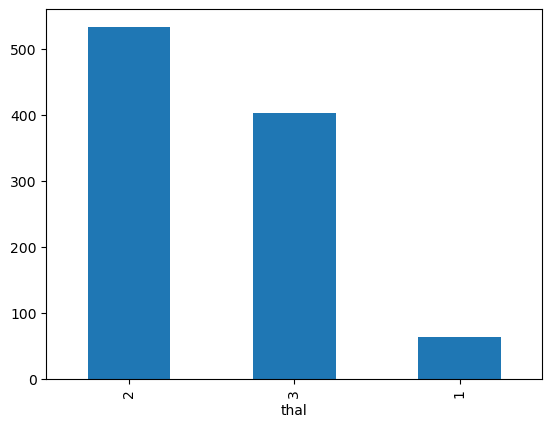

In [6]:
df['thal'].value_counts().plot(kind='bar') 

<Axes: xlabel='trestbps'>

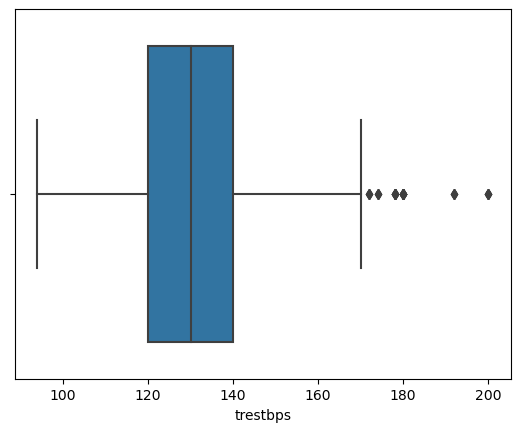

In [13]:
sns.boxplot(x='trestbps', data=df)


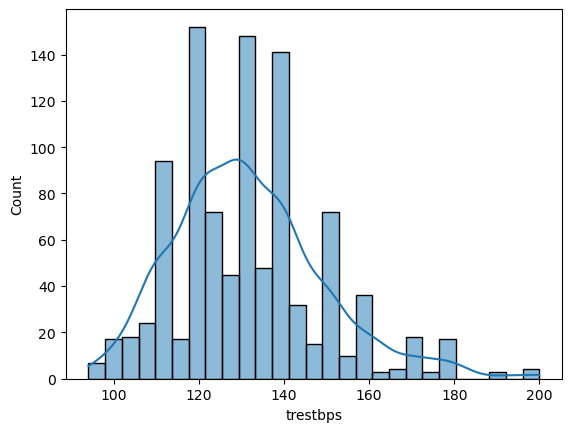

In [7]:
sns.histplot(data = df, x = "trestbps", kde = True)
plt.show()

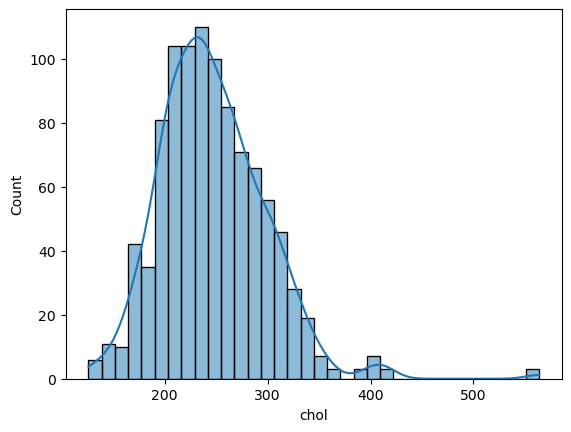

In [15]:
sns.histplot(data = df, x = "chol", kde = True)
plt.show()

In [16]:
con = ['age','trestbps','chol','thalach','oldpeak']

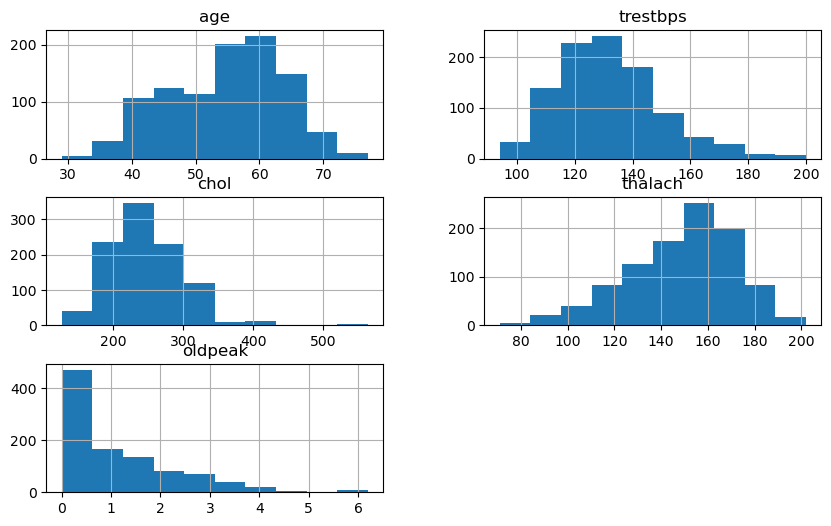

In [17]:
df.hist(con,figsize=(10,6))
plt.show()

<Axes: xlabel='sex', ylabel='thalach'>

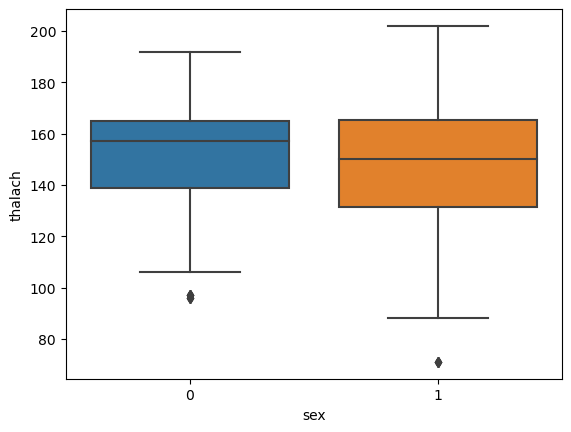

In [18]:
sns.boxplot(x= 'sex',y = 'thalach',data= df)

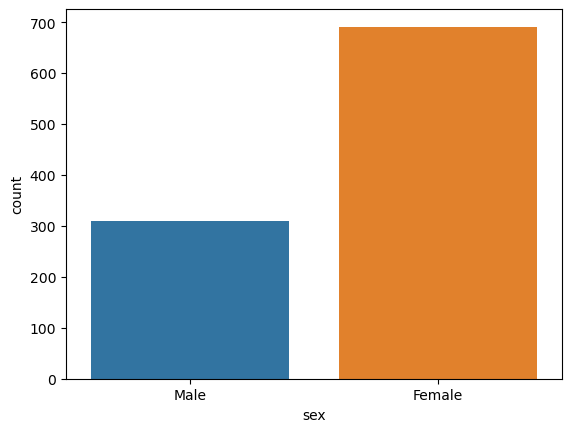

In [19]:
sns.countplot(x=df['sex'])
plt.xticks([1,0],['Female','Male'])
plt.show()

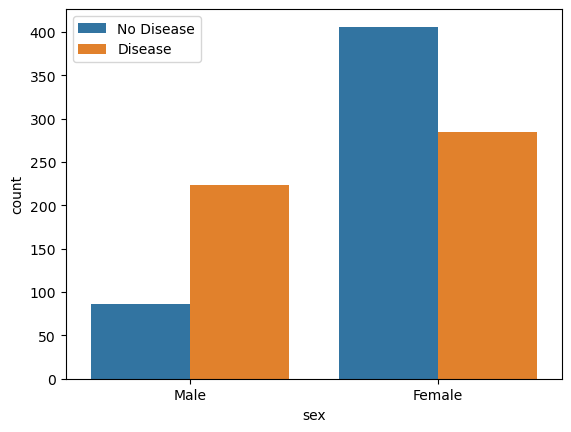

In [20]:
sns.countplot(x='sex',hue="target",data=df)
plt.xticks([0,1],['Male','Female'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

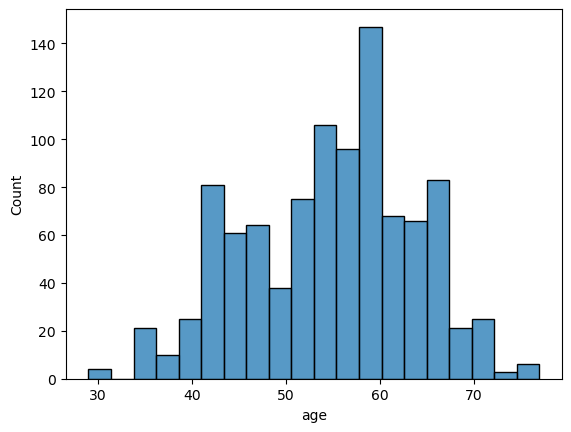

In [21]:
sns.histplot(df['age'],bins=20)
plt.show()

chest pain type (0 = typical angina;
                 1 = atypical angina;
                 2 = non-anginal pain; 
                 3 = asymptomatic)

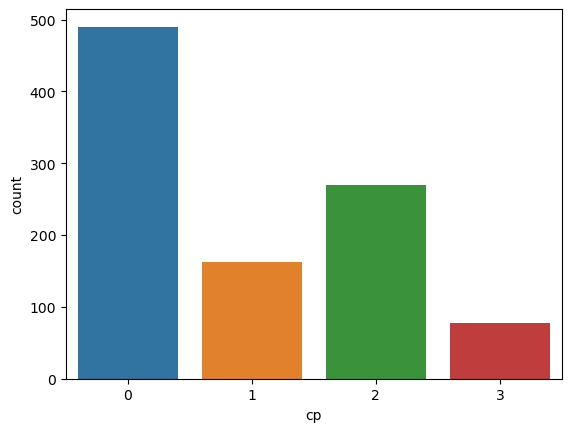

In [22]:
sns.countplot(x=df['cp'])
plt.show()

<Axes: >

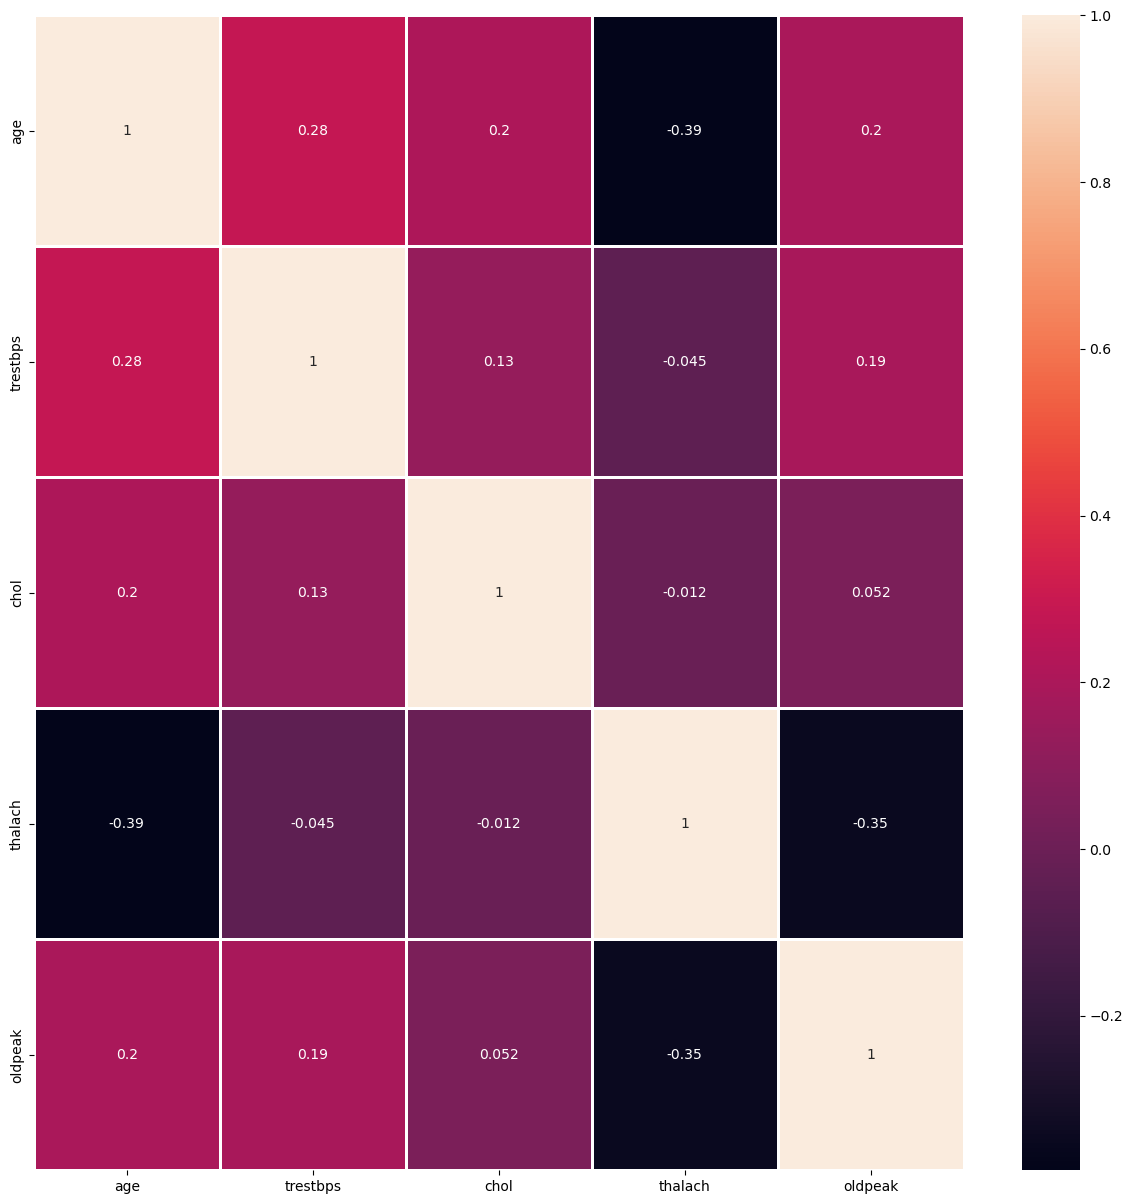

In [23]:
corr=df[con].corr()
plt.figure(figsize= (15,15))
sns.heatmap(corr, linewidth=1,annot=True,linecolor='white')

<Axes: xlabel='age', ylabel='thalach'>

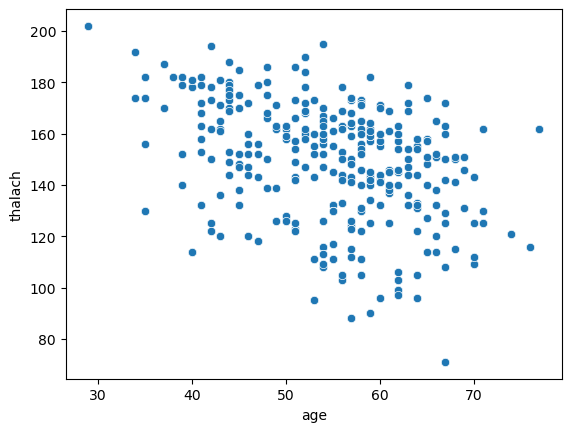

In [24]:
sns.scatterplot(x='age', y='thalach', data=df)


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


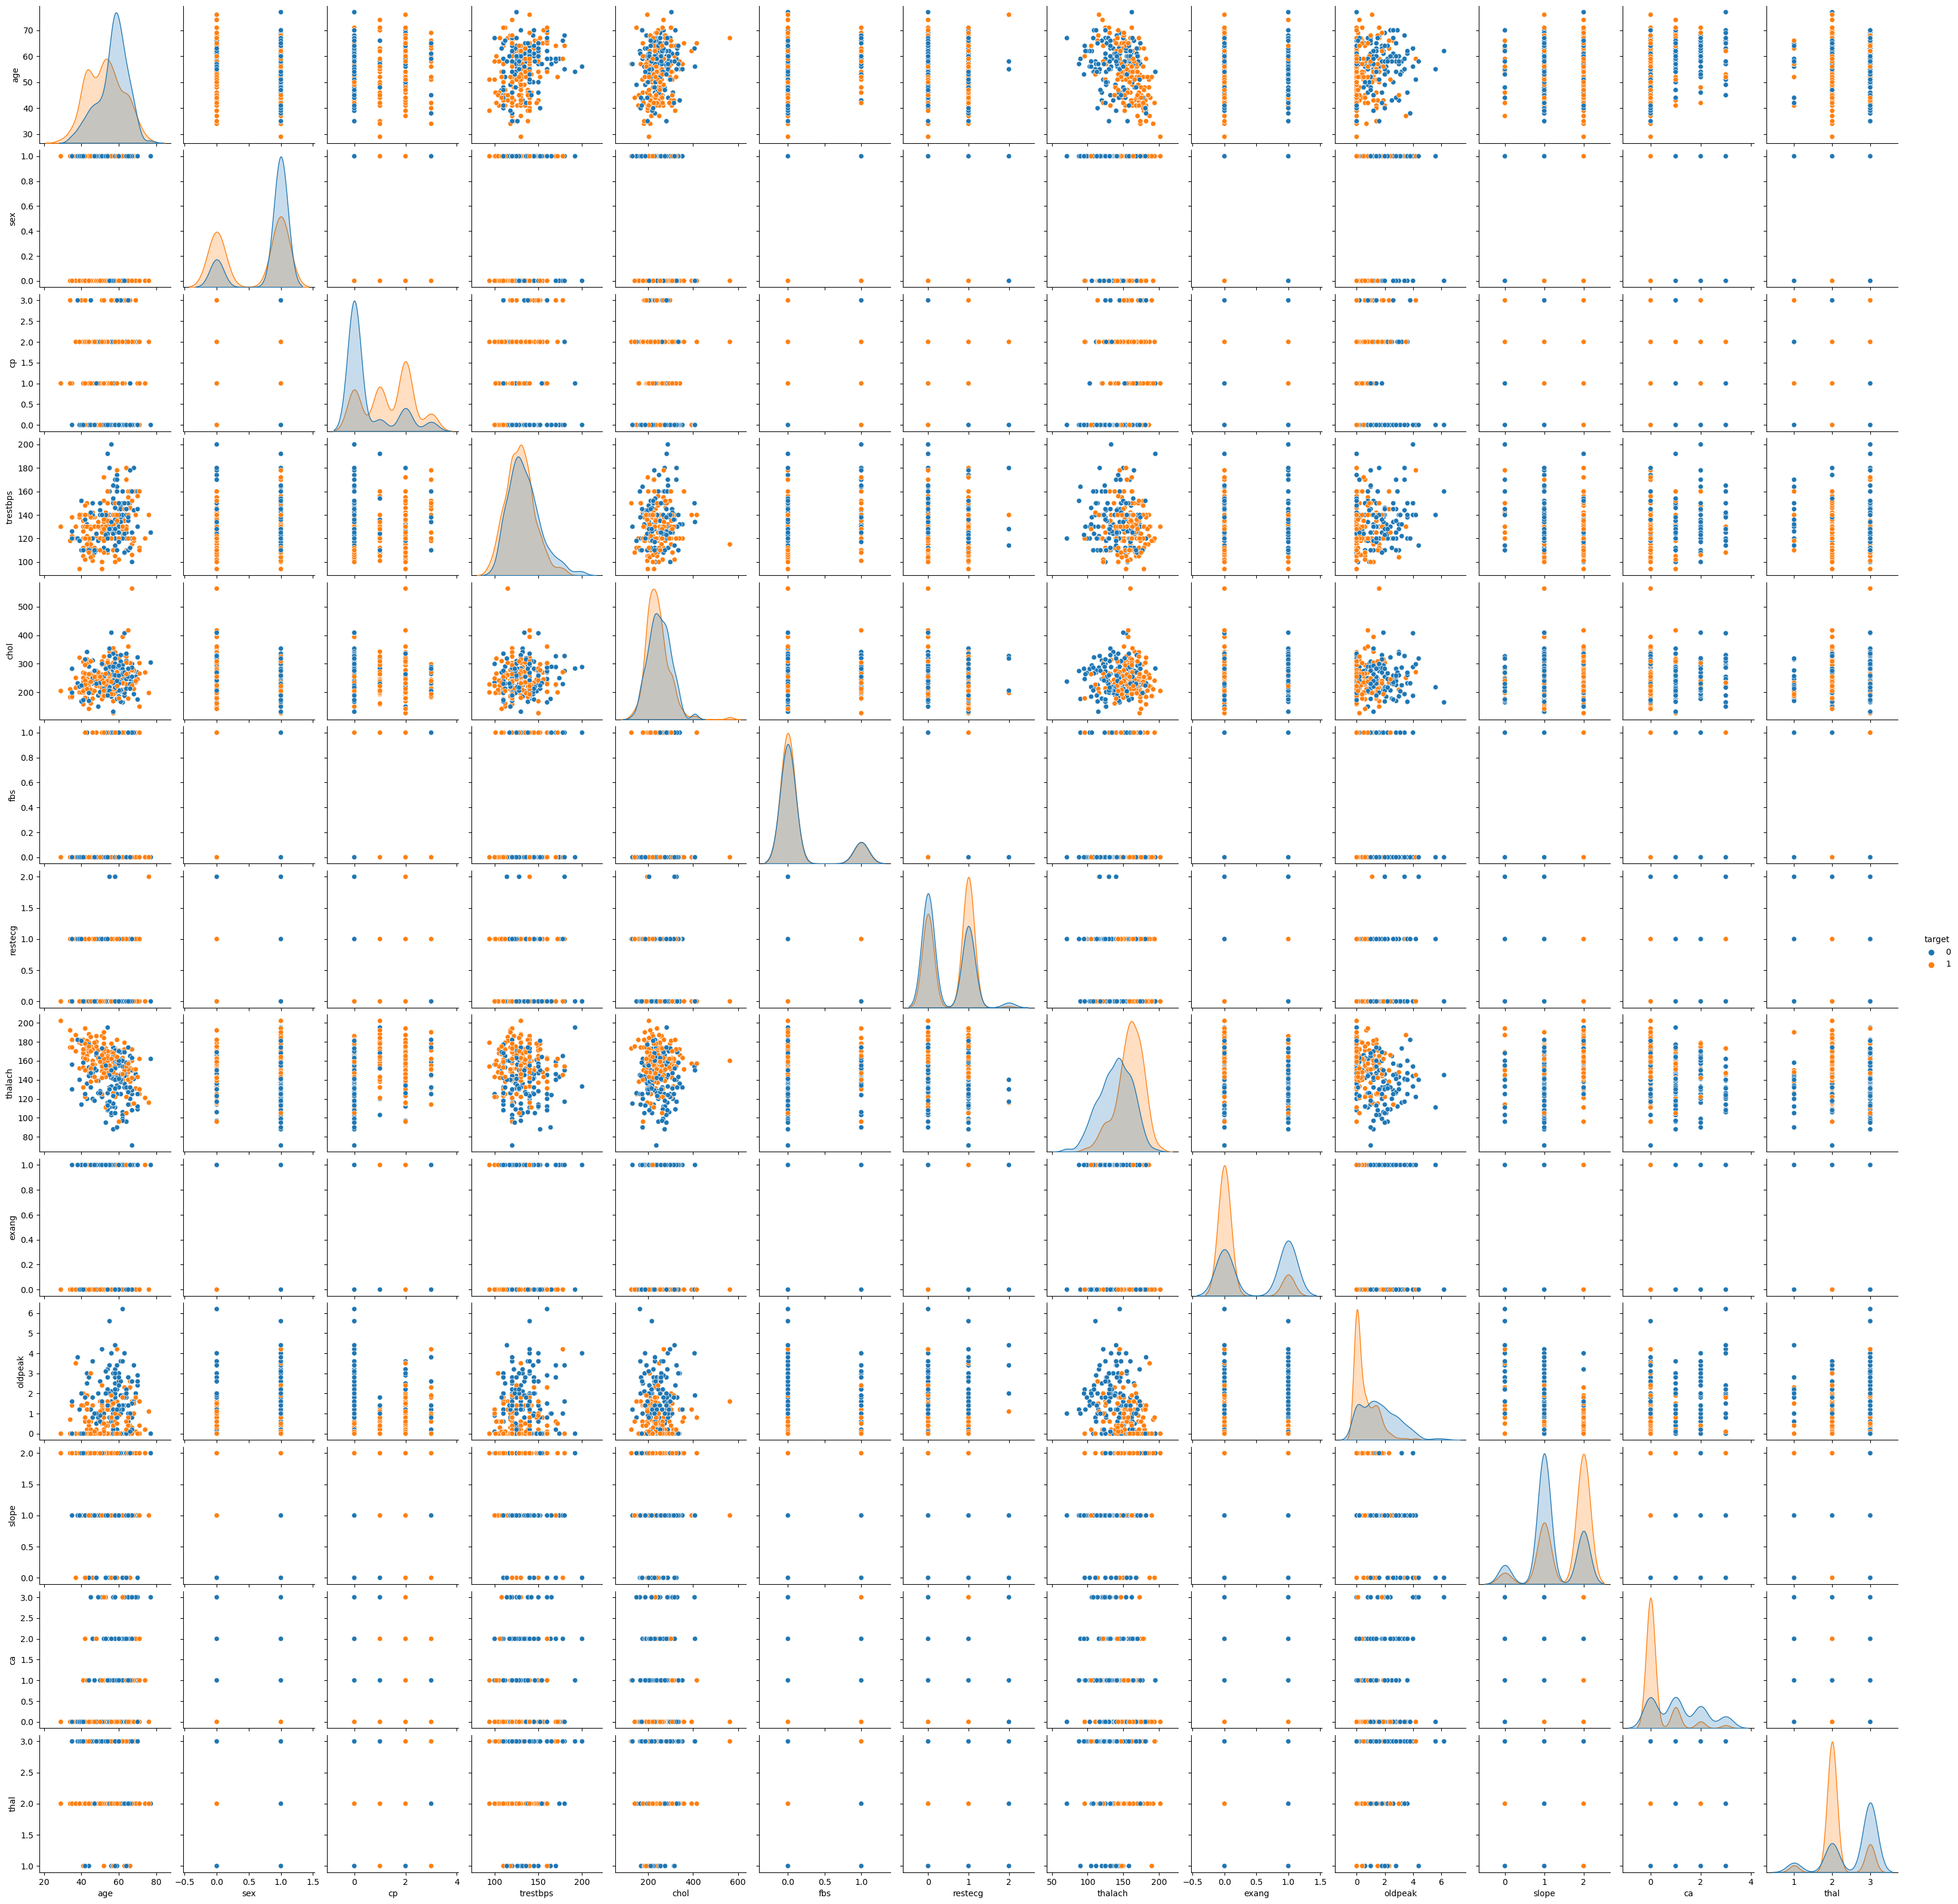

In [25]:
sns.pairplot(df,hue='target')

In [8]:
X = df.drop('target', axis=1)
y = df['target']

In [9]:
y.value_counts()

target
1    508
0    492
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [11]:
# scaling x axis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.28859878,  0.66871369, -0.90562568, ...,  0.99911643,
         1.37570199,  1.11399027],
       [-0.17789729,  0.66871369, -0.90562568, ..., -2.2290465 ,
        -0.74239191,  1.11399027],
       [ 1.70402799,  0.66871369, -0.90562568, ..., -2.2290465 ,
        -0.74239191,  1.11399027],
       ...,
       [-0.84210621,  0.66871369, -0.90562568, ..., -0.61496504,
         0.31665504, -0.57132028],
       [-0.51000175, -1.49540829, -0.90562568, ...,  0.99911643,
        -0.74239191, -0.57132028],
       [-0.0671958 ,  0.66871369, -0.90562568, ..., -0.61496504,
         0.31665504,  1.11399027]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
import numpy as np
np.save('y_true.npy', y_train)


KNN


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)

NameError: name 'KNeighborsClassifier' is not defined

In [70]:
import pickle

with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [55]:
cm_knn=confusion_matrix(y_test,pred_knn)
print("Confusion Matrix   :", cm_knn)
accuracy_knn = accuracy_score(y_test, pred_knn)
print("Accuracy   :", accuracy_knn)
precision_knn = precision_score(y_test, pred_knn)
print("Precision :", precision_knn)
recall_knn = recall_score(y_test, pred_knn)
print("Recall    :", recall_knn)
F1_score_knn= f1_score(y_test, pred_knn)
print("F1-score  :", F1_score_knn)

Confusion Matrix   : [[114  24]
 [ 21 141]]
Accuracy   : 0.85
Precision : 0.8545454545454545
Recall    : 0.8703703703703703
F1-score  : 0.8623853211009175


Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier


In [56]:
rf = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=5)
rf_model = rf.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

In [68]:
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [57]:
cm_rf=confusion_matrix(y_test,pred_rf)
print("Confusion Matrix   :", cm_rf)
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy   :", accuracy_rf)
precision_rf = precision_score(y_test, pred_rf)
print("Precision :", precision_rf)
recall_rf = recall_score(y_test, pred_rf)
print("Recall    :", recall_rf)
F1_score_rf = f1_score(y_test, pred_rf)
print("F1-score  :", F1_score_rf)

Confusion Matrix   : [[128  10]
 [  5 157]]
Accuracy   : 0.95
Precision : 0.9401197604790419
Recall    : 0.9691358024691358
F1-score  : 0.9544072948328267


SVM

In [44]:
from sklearn.svm import SVC


In [58]:
svc =  SVC(C=2)
svm_model = svc.fit(X_train, y_train)
pred_svm = svm_model.predict(X_test)

In [69]:
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [59]:
cm_svm=confusion_matrix(y_test,pred_svm)
print("Confusion Matrix   :", cm_svm)
accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy   :", accuracy_svm)
precision_svm = precision_score(y_test, pred_svm)
print("Precision :", precision_svm)
recall_svm = recall_score(y_test, pred_svm)
print("Recall    :", recall_svm)
F1_score_svm = f1_score(y_test, pred_svm)
print("F1-score  :", F1_score_svm)

Confusion Matrix   : [[131   7]
 [  7 155]]
Accuracy   : 0.9533333333333334
Precision : 0.9567901234567902
Recall    : 0.9567901234567902
F1-score  : 0.9567901234567902


Xgboost

In [50]:
from xgboost import XGBClassifier

In [60]:
xg = XGBClassifier(learning_rate=0.05, n_estimators=100, max_depth=15)
xg_model = xg.fit(X_train, y_train)
pred_xg = xg_model.predict(X_test)

In [ ]:
with open('xg_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [61]:
cm_xg=confusion_matrix(y_test,pred_xg)
print("Confusion Matrix   :", cm_xg)
accuracy_xg = accuracy_score(y_test, pred_xg)
print("Accuracy   :", accuracy_xg)
precision_xg = precision_score(y_test, pred_xg)
print("Precision :", precision_xg)
recall_xg = recall_score(y_test, pred_xg)
print("Recall    :", recall_xg)
F1_score_xg = f1_score(y_test, pred_xg)
print("F1-score  :", F1_score_xg)

Confusion Matrix   : [[138   0]
 [  2 160]]
Accuracy   : 0.9933333333333333
Precision : 1.0
Recall    : 0.9876543209876543
F1-score  : 0.9937888198757764


In [62]:
models = [knn_model,rf_model,svm_model,xg_model]

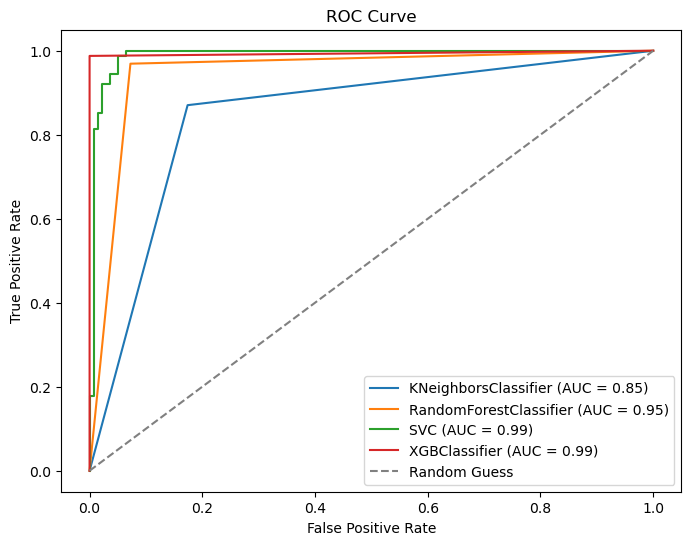

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for model in models:
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
